In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Encode String Attribute to Integer**

In [16]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [18]:
sample = df_3d

**Elbow Implimentation with Sum of Squared Error**

In [57]:
SSE={}
slope=[]
K = range(1,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)
    #Calculate slope of each line
    #if k>1:
        #s= (SSE[-1]-SSE[-2])
        #slope.append([k,s])

cluster mean =2.05947818027379
{1: 136.05227726629911}
cluster mean =1.1234418906422632
cluster mean =0.49095444722081294
{1: 136.05227726629911, 2: 33.401382289704394}
cluster mean =3.3948673201041184
cluster mean =5.189503791909113
cluster mean =1.9990427387487983
{1: 136.05227726629911, 2: 33.401382289704394, 3: 33.901043699494636}
cluster mean =3.058726517625513
cluster mean =1.5362503868346127
cluster mean =5.483504376903131
cluster mean =1.3595379497746607
{1: 136.05227726629911, 2: 33.401382289704394, 3: 33.901043699494636, 4: 19.89375603031108}
cluster mean =1.24911433322469
cluster mean =4.926781957365475
cluster mean =4.905305732341333
cluster mean =2.3291981825278856
cluster mean =3.320064245148504
{1: 136.05227726629911, 2: 33.401382289704394, 3: 33.901043699494636, 4: 19.89375603031108, 5: 15.733357542792952}
cluster mean =0.8316526595019527
cluster mean =0.45152817690634384
cluster mean =1.5733704700185729
cluster mean =3.341899336813537
cluster mean =2.1582693473587877
c

**Ploting Elbow**

In [54]:
y=[]
for key,value in SSE.items():
    y.append(value)
print(y)

[136.05227726629911, 33.401382289704394, 37.66359691186651, 19.678632500148762, 16.851335031781485, 19.363715255165634, 7.422900538171613, 7.314812078141591, 8.285902455899345]


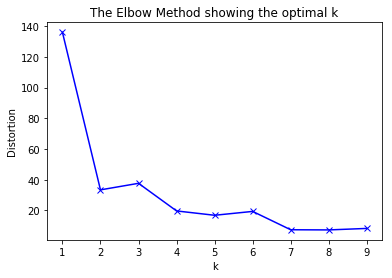

In [55]:
plt.plot(K,y,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
slope

[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1]]

In [13]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))